In [10]:
from pathlib import Path
import ibllib.io.raw_data_loaders as raw
import matplotlib.pyplot as plt
import numpy as np
import sys

import utils as ut
import pandas as pd
import seaborn as sns
import os

In [2]:
session_path = ut.selectFolder()


2023-02-06 16:21:41.246 python[12543:14428846] +[CATransaction synchronize] called within transaction


In [46]:
# load trial info from encoder 
data = raw.load_data(session_path)
trialinfo_df = raw.load_encoder_trial_info(session_path)
trialinfo_df

,trial_num,stim_pos_init,stim_contrast,stim_freq,stim_angle,stim_gain,stim_sigma,stim_phase,bns_ts
0,1,-1,1.0,0.06,-0.785398,3.0,10000,0.000000,2022-09-06T22:52:50.9112448-07:00
1,2,1,0.5,0.06,0.785398,1.5,10000,142.737293,2022-09-06T22:52:58.9315200-07:00
2,3,1,0.5,0.06,0.785398,1.5,10000,212.813709,2022-09-06T22:53:22.3852800-07:00
3,4,1,0.5,0.06,0.785398,1.5,10000,214.865512,2022-09-06T22:53:45.7392256-07:00
4,5,1,0.5,0.06,0.785398,1.5,10000,109.782956,2022-09-06T22:54:09.3265536-07:00
...,...,...,...,...,...,...,...,...,...
188,189,1,1.0,0.06,0.785398,1.5,10000,195.802003,2022-09-06T23:16:06.4256896-07:00
189,190,1,0.5,0.06,0.785398,1.5,10000,200.683266,2022-09-06T23:16:10.9931392-07:00
190,191,1,0.5,0.06,0.785398,1.5,10000,359.289616,2022-09-06T23:16:34.9147520-07:00
191,192,-1,1.0,0.06,-0.785398,3.0,10000,296.444799,2022-09-06T23:16:39.2654336-07:00


In [47]:
# getting a list of correct trials 
correcttrials_lst = [d['trial_correct'] for d in data]
# correcting for the possibility of the last trial not being saved in the encoder_trial_info file 
diff = len(trialinfo_df) - len(correcttrials_lst)
if diff:
    print(f'warning, {diff} trial\'s is/are missing from the data dictionary')
    trialinfo_df = trialinfo_df[:-diff]

assert (len(trialinfo_df) == len(correcttrials_lst)), 'trialinfo_df and correcttrials_lst are not the same length'



warning, 1 trial's is/are missing from the data dictionary


In [48]:
# injecting trial-wise data into the trialinfo_df, changing values to 1 or 2 to conform to psytrack's format

"""correct -- the accurarcy of the choice (1 = correct, 2 = incorrect)"""
trialinfo_df.loc[:, 'correct'] = [1 if x else 0 for x in correcttrials_lst]


"""answer -- the correct answer choice """
# changing stim angle value to 0 (- left) or 1 (+ right)
def changeVals(x):
    if x < 0:
        return 1
    else:
        return 2
trialinfo_df['answer'] = trialinfo_df['stim_angle'].apply(changeVals)


# adds a column for when the wheel is turned to the left:
trialinfo_df["LeftTurn"] = ((trialinfo_df["stim_angle"] < 0) & (trialinfo_df["correct"] == 1)) | ((trialinfo_df["stim_angle"] >= 0) & (trialinfo_df["correct"] == 0))
trialinfo_df["LeftTurn"] = trialinfo_df["LeftTurn"].astype(int)


# adds signed contrast
trialinfo_df.loc[:,'signedContrast'] = trialinfo_df.stim_contrast.values*trialinfo_df.stim_pos_init.values


# # changes the contrast column by multiplying by 100 and making them integers
# trialinfo_df['stim_contrast'] = (trialinfo_df['stim_contrast'] * 100).astype(np.int64)





/var/folders/8f/5wxb25nd0y12wfq_xr45zv5w0000gn/T/ipykernel_12543/2659607023.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trialinfo_df.loc[:, 'correct'] = [1 if x else 0 for x in correcttrials_lst]
/var/folders/8f/5wxb25nd0y12wfq_xr45zv5w0000gn/T/ipykernel_12543/2659607023.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trialinfo_df['answer'] = trialinfo_df['stim_angle'].apply(changeVals)
/var/folders/8f/5wxb25nd0y12wfq_xr45zv5w0000gn/T/ipykernel_12543/2659607023.py:18: SettingWithCopyWarning: 
A

In [49]:
trialinfo_df.head(10)

,trial_num,stim_pos_init,stim_contrast,stim_freq,stim_angle,stim_gain,stim_sigma,stim_phase,bns_ts,correct,answer,LeftTurn,signedContrast
0,1,-1,1.0,0.06,-0.785398,3.0,10000,0.000000,2022-09-06T22:52:50.9112448-07:00,1,1,1,-1.0
1,2,1,0.5,0.06,0.785398,1.5,10000,142.737293,2022-09-06T22:52:58.9315200-07:00,0,2,1,0.5
2,3,1,0.5,0.06,0.785398,1.5,10000,212.813709,2022-09-06T22:53:22.3852800-07:00,0,2,1,0.5
3,4,1,0.5,0.06,0.785398,1.5,10000,214.865512,2022-09-06T22:53:45.7392256-07:00,0,2,1,0.5
4,5,1,0.5,0.06,0.785398,1.5,10000,109.782956,2022-09-06T22:54:09.3265536-07:00,0,2,1,0.5
5,6,1,0.5,0.06,0.785398,1.5,10000,4.020464,2022-09-06T22:54:33.0472704-07:00,0,2,1,0.5
6,7,1,0.5,0.06,0.785398,1.5,10000,306.754423,2022-09-06T22:54:56.4216576-07:00,1,2,0,0.5
7,8,-1,0.5,0.06,-0.785398,3.0,10000,289.439675,2022-09-06T22:55:00.8558336-07:00,1,1,1,-0.5
8,9,-1,0.5,0.06,-0.785398,3.0,10000,247.447290,2022-09-06T22:55:04.9736704-07:00,0,1,0,-0.5
9,10,-1,0.5,0.06,-0.785398,3.0,10000,324.992203,2022-09-06T22:55:28.2118016-07:00,1,1,1,-0.5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/8f/5wxb25nd0y12wfq_xr45zv5w0000gn/T/ipykernel_12543/3572771070.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels =np.round(np.arange(-0.2,1.2,0.2),2),fontsize = 15)


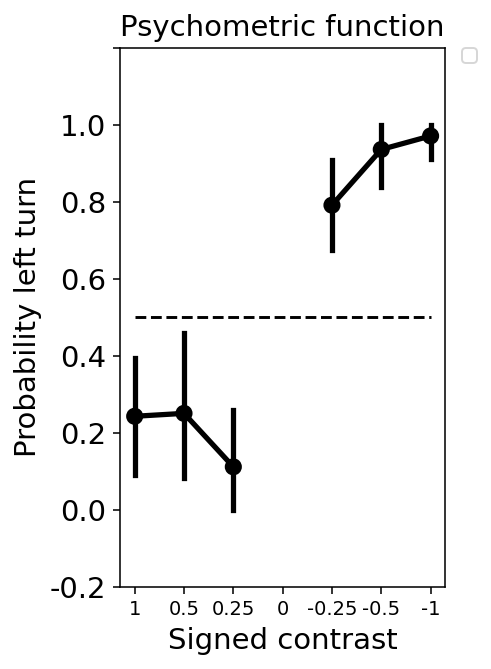

In [50]:
dtp = trialinfo_df
x = 'signedContrast'
y = 'LeftTurn'
hue = 'mouse'
minTrial = 30
maxTrial = 1000

fig,ax = plt.subplots(1,1,figsize = (3,5))
order = [1,0.5,0.25,0,-0.25,-0.5,-1]
#ax = sns.pointplot(data = data,x=x,y=y,hue=hue,palette= palette,order = order,alpha = 0.5,aspect = 1.5,dodge=0.2)
ax = sns.pointplot(data = dtp,x=x,y=y,color='black',order = order)
#ax = sns.pointplot(data = data,x=x,y=y)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Psychometric function',fontsize = 15)
ax.set_xlabel('Signed contrast',fontsize = 15)
ax.set_ylabel('Probability left turn',fontsize = 15)
ax.set_ylim(-0.2,1.2)
#ax.set_xticklabels([-45,45],fontsize = 15)
ax.set_yticklabels(labels =np.round(np.arange(-0.2,1.2,0.2),2),fontsize = 15)
ax.axes.hlines(0.5,0,6,linestyles='dashed',color='black')
# ax.axes.hlines(0.70,0,data[x].max()-data[x].min(),linestyles='dashed',color='black')
plt.show()

In [51]:
D = dict()
D['name'] = ut.writtenInput('Enter the name of the subject: ')
# D['y'] represents direction of the turn (0 is right, 1 is left) for each trial
D['y'] = trialinfo_df.LeftTurn.values+1 
# D['y']

In [52]:
# s1 is stim_angle and s2 is stim_contrast
varstoadd = ['stim_angle','stim_contrast']
outputs = []
for name in varstoadd:
    currenttrial = trialinfo_df[name].values
    prevtrial = np.insert(trialinfo_df[name].values[:-1],0,trialinfo_df[name].values[0])
    assert len(currenttrial) == len(prevtrial)
    both = np.stack([currenttrial,prevtrial]).T
    outputs.append(both)
# outputs is a list of 2d arrays, each array has 2 columns, the first column is the current trial's value, the second column is the previous trial's value
# there will be one stack for each variable in varstoadd

In [53]:
D['inputs'] = dict()
# as the input variable are put into the dictionary, their names are also changed to s1 and s2 (to work with psytrack, not sure why it only works this way, though?)
nameChange_lst = ['s1','s2']
for idx,name in enumerate(nameChange_lst):
    D['inputs'][name] = outputs[idx]

In [54]:
# D['dayLength'][0] = len(data)
# not yet functional

In [55]:
D['answer'] = trialinfo_df['answer'].to_numpy()
D['correct'] = trialinfo_df['correct'].to_numpy()

In [56]:
np.savez('D.npz', **D)

# Moving onto psytrack

In [57]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
plt.rcParams['figure.dpi'] = 140

import psytrack as psy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
print("The keys of the dict:\n   ", list(D.keys()))
print("The keys of inputs are\n :", list(D['inputs'].keys()))
inputs = D['inputs']

The keys of the dict:
    ['name', 'y', 'inputs', 'answer', 'correct']
The keys of inputs are
 : ['s1', 's2']


In [59]:
print("The shape of y:   ", D['y'].shape) # y is the animal's choice (0 or 1)
print("The number of trials:   N =", D['y'].shape[0])
print("The unique entries of y:   ", np.unique(D['y']))

The shape of y:    (192,)
The number of trials:   N = 192
The unique entries of y:    [1 2]


 `x[7,0]` would encode the stimulus heard on the 7th trial where as both `x[6,0]` and `x[7,1]` would encode the stimulus heard on the 6th trial. The information is redundant, but allows for all feasible regressors to predicting behavior of trial $i$ to be accessible by referencing the $i^{th}$ row of the respective input array.See the below for examples:

In [61]:
print("The keys of inputs:\n   ", list(D['inputs'].keys()))

print("\nThe shape of stim_angle:", D['inputs']['s1'].shape)
print("s1[7]   : ", D['inputs']['s1'][7])
print("s1[6,0] : ", D['inputs']['s1'][6,0])
print("s1[7,1] : ", D['inputs']['s1'][7,1])

print(inputs['s1'][4])

The keys of inputs:
    ['s1', 's2']

The shape of stim_angle: (192, 2)
s1[7]   :  [-0.7853982  0.7853982]
s1[6,0] :  0.7853982
s1[7,1] :  0.7853982
[0.7853982 0.7853982]


# Weights

In [62]:
# s1 is stim angle and s2 is stim contrast
weights = {
    'bias': 1,
    's1': 1,
    's2': 1
}

# marking the total number of weights:
K = np.sum([weights[i] for i in weights.keys()])

# Hyperparameters

In [63]:
hyper = {
    'sigInit': 2**4, # set to a single, large value for all weights. Will not be optimize further. not sure why?
    'sigma': [2**-4.] * K, # each weight willhave it's own sigma optimized, but all are initialized the same 
    'sigDay': None # indicates that session boundaries will be ignored in the optimization
}

In [64]:
optList = ['sigma']

# """
# Other options:
# * nothing
# * 'sigDay'
# * 'sigma'
# * 'sigma, 'sigDay'
# """

In [65]:
new_D = psy.trim(D, END=190)
# not super necessary, there aren't 1000 trials in the sample data you're using, but it's good practice for future data

In [66]:
hyp, evd, wMode, hess_info = psy.hyperOpt(new_D, hyper, weights, optList)

In [67]:
seed = 31
num_weights = 3
num_trials = 5000
simData = psy.generateSim(K = num_weights, N = num_trials, hyper = hyper, boundary = 6.0, iterations = 1, seed = seed, savePath = None)

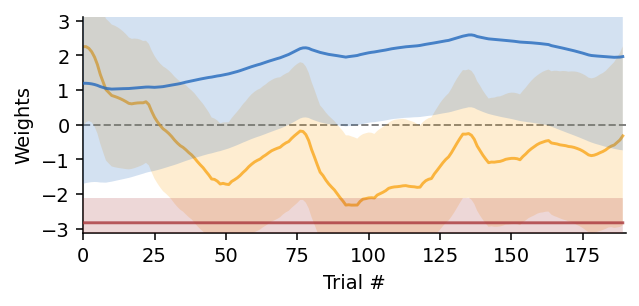

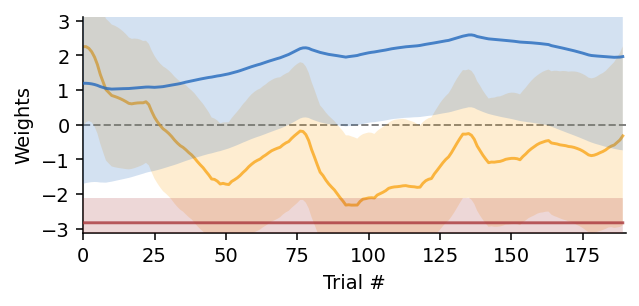

In [68]:
psy.plot_weights(wMode, weights, errorbar=hess_info["W_std"])

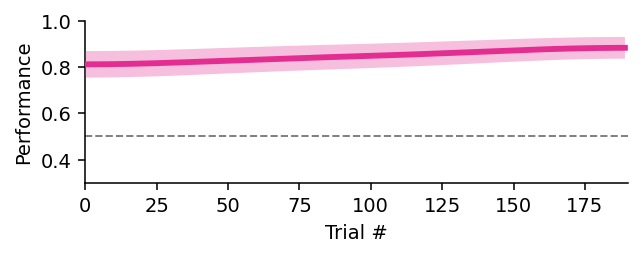

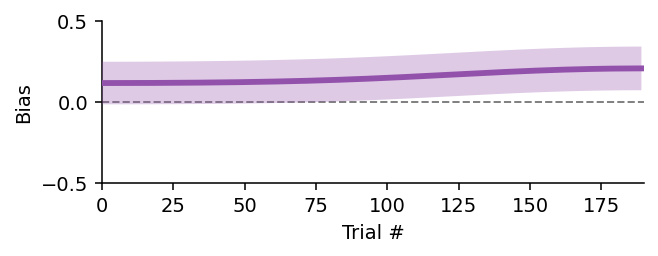

In [69]:
fig_perf = psy.plot_performance(new_D)
fig_bias = psy.plot_bias(new_D)

In [70]:
new_D['inputs'].keys()

dict_keys(['s1', 's2'])

In [71]:
xval_logli, xval_pL = psy.crossValidate(new_D, hyper, weights, optList, F=10, seed=41)

Running xval fold 10 of 10

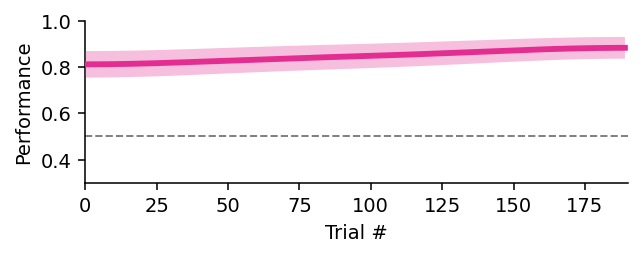

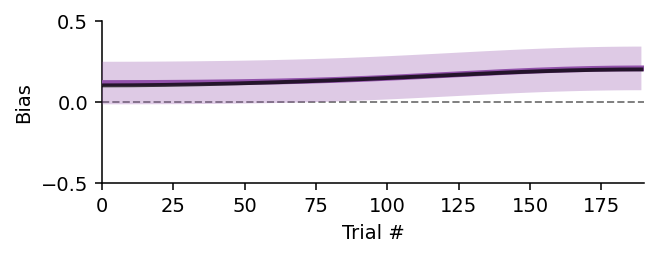

In [72]:
fig_perf_xval = psy.plot_performance(new_D, xval_pL=xval_pL)
fig_bias_xval = psy.plot_bias(new_D, xval_pL=xval_pL)